Step 1 — Create Data with NumPy

In [1]:
import numpy as np
import pandas as pd

In [5]:
np.random.seed(42) # reproducible results

In [6]:
# 100 student IDs (S001, S002, ...)
student_ids = [f"S{i:03}" for i in range (1, 101)]

In [8]:
# Random scores for 3 subjects (0-100)
math_scores = np.random.randint(50,101,size = 100)
science_scores = np.random.randint(40,101,size=100)
english_scores = np.random.randint(45,101,size=100)

Step 2 — Create Pandas DataFrame

In [9]:
df = pd.DataFrame({
    'StudentID':student_ids,
    'Math':math_scores,
    'Science':science_scores,
    'English':english_scores
})
df

,StudentID,Math,Science,English
0,S001,74,76,51
1,S002,56,72,60
2,S003,58,90,70
3,S004,73,81,92
4,S005,50,83,96
...,...,...,...,...
95,S096,88,62,74
96,S097,55,70,73
97,S098,57,69,90
98,S099,76,81,97


Step 3 — Add a New Column

In [14]:
df['Average'] = df[['Math', 'Science', 'English']].mean(axis=1)
df

,StudentID,Math,Science,English,Average
0,S001,74,76,51,67.000000
1,S002,56,72,60,62.666667
2,S003,58,90,70,72.666667
3,S004,73,81,92,82.000000
4,S005,50,83,96,76.333333
...,...,...,...,...,...
95,S096,88,62,74,74.666667
96,S097,55,70,73,66.000000
97,S098,57,69,90,72.000000
98,S099,76,81,97,84.666667


Step 4 — Basic Analysis

1. Find the top 5 students by average score.

In [50]:
df.sort_values(by = 'Average', ascending = False).head(5)

,StudentID,Math,Science,English,Average,Performance
72,S073,100,99,82,93.666667,Excellent
13,S014,84,91,99,91.333333,Excellent
57,S058,98,73,100,90.333333,Excellent
24,S025,83,88,100,90.333333,Excellent
16,S017,91,97,79,89.000000,Good


2. Count how many students scored above 90 in Math.

In [24]:
(df['Math']>90).sum()

np.int64(16)

3. Find the mean Science score.

In [25]:
(df['Science']).mean()

np.float64(70.71)

4. Find the student with the lowest English score.

In [26]:
df.sort_values(by = 'English' , ascending = True).head(1)

,StudentID,Math,Science,English,Average
7,S008,73,98,45,72.0


Step 5 — Categorize Performance

In [28]:
def performance(average):
    if average >=90:
        return 'Excellent'
    elif average >=75:
        return 'Good'
    elif average >=60:
        return 'Average'
    else:
        return 'Poor'
df['Performance'] = df['Average'].apply(performance)
df

,StudentID,Math,Science,English,Average,Performance
0,S001,74,76,51,67.000000,Average
1,S002,56,72,60,62.666667,Average
2,S003,58,90,70,72.666667,Average
3,S004,73,81,92,82.000000,Good
4,S005,50,83,96,76.333333,Good
...,...,...,...,...,...,...
95,S096,88,62,74,74.666667,Average
96,S097,55,70,73,66.000000,Average
97,S098,57,69,90,72.000000,Average
98,S099,76,81,97,84.666667,Good


another way of doint it:

In [35]:
conditions = [
    df['Average'] >=90,
    (df['Average'] >=75) & (df['Average']<90),
    (df['Average'] >= 60) & (df['Average'] < 75),
    df['Average']<60
]
choices = ['Excellent' , 'Good', 'Average', 'Poor']
df['Performance1'] = np.select(conditions,choices, default = 'Unknown')
df

,StudentID,Math,Science,English,Average,Performance,Performance1
0,S001,74,76,51,67.000000,Average,Average
1,S002,56,72,60,62.666667,Average,Average
2,S003,58,90,70,72.666667,Average,Average
3,S004,73,81,92,82.000000,Good,Good
4,S005,50,83,96,76.333333,Good,Good
...,...,...,...,...,...,...,...
95,S096,88,62,74,74.666667,Average,Average
96,S097,55,70,73,66.000000,Average,Average
97,S098,57,69,90,72.000000,Average,Average
98,S099,76,81,97,84.666667,Good,Good


Step 6 — Group Analysis

Average scores per performance category:

In [41]:
df.groupby('Performance')[['Math', 'Science', 'English']].mean()

,Math,Science,English
Performance,,,
Average,71.320000,66.540000,70.840000
Excellent,91.250000,87.750000,95.250000
Good,79.085714,82.314286,82.400000
Poor,68.272727,46.545455,53.818182


Delete a column

In [47]:
df.drop(columns = 'Performance1', inplace = True)

In [48]:
df

,StudentID,Math,Science,English,Average,Performance
0,S001,74,76,51,67.000000,Average
1,S002,56,72,60,62.666667,Average
2,S003,58,90,70,72.666667,Average
3,S004,73,81,92,82.000000,Good
4,S005,50,83,96,76.333333,Good
...,...,...,...,...,...,...
95,S096,88,62,74,74.666667,Average
96,S097,55,70,73,66.000000,Average
97,S098,57,69,90,72.000000,Average
98,S099,76,81,97,84.666667,Good


Step 7 — Save to CSV

In [49]:
df.to_csv('student_scores.csv', index = False)

## Analysis

1. Subject Difficulty

Find out which subject has the lowest overall average score.

In [61]:
# Calculate average score per subject
subject_means = df[['Math', 'Science', 'English']].mean()

# Find the subject with lowest average
lowest_subject = subject_means.idxmin()

print('Average score: \n', subject_means)
print('Hardest subject:', lowest_subject)

Average score: 
 Math       74.50
Science    70.71
English    73.99
dtype: float64
Hardest subject: Science


2. Top Performers per Subject

Find the top 3 students for each subject (Math, Science, English).

In [69]:
for subject in ['Math', 'Science', 'English']:
    print(f'Top 3 in {subject}')
    top_students = df.sort_values(by=subject, ascending = False).head(3)
    print(top_students[['StudentID', subject]])

Top 3 in Math
   StudentID  Math
9       S010   100
54      S055   100
72      S073   100
Top 3 in Science
   StudentID  Science
72      S073       99
65      S066       99
27      S028       98
Top 3 in English
   StudentID  English
24      S025      100
57      S058      100
67      S068       99


3. Performance Category Count

Count how many students fall into each Performance category.
(Hint: value_counts() on the Performance column.)

In [71]:
df['Performance'].value_counts()

Performance
Average      50
Good         35
Poor         11
Excellent     4
Name: count, dtype: int64

4. Best Subject for Each Student

Create a new column "BestSubject" that stores which subject the student scored highest in.

In [73]:
df['BestSubject'] = df[['Math', 'Science', 'English']].idxmax(axis=1)
df

,StudentID,Math,Science,English,Average,Performance,BestSubject
0,S001,74,76,51,67.000000,Average,Science
1,S002,56,72,60,62.666667,Average,Science
2,S003,58,90,70,72.666667,Average,Science
3,S004,73,81,92,82.000000,Good,English
4,S005,50,83,96,76.333333,Good,English
...,...,...,...,...,...,...,...
95,S096,88,62,74,74.666667,Average,Math
96,S097,55,70,73,66.000000,Average,English
97,S098,57,69,90,72.000000,Average,English
98,S099,76,81,97,84.666667,Good,English


5. Visualizations (Matplotlib / Seaborn)

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

Bar chart: Average score per Performance category.

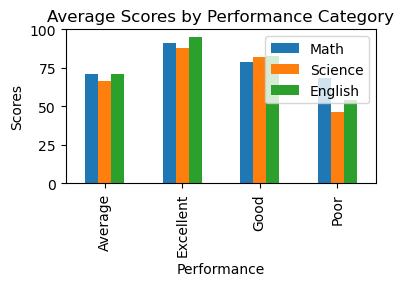

In [78]:
avg_scores = df.groupby('Performance')[['Math', 'Science', 'English']].mean()
avg_scores.plot(kind = 'bar', figsize = (4,2))
plt.title('Average Scores by Performance Category')
plt.ylabel('Scores')
plt.show()

Histogram: Distribution of Math scores.

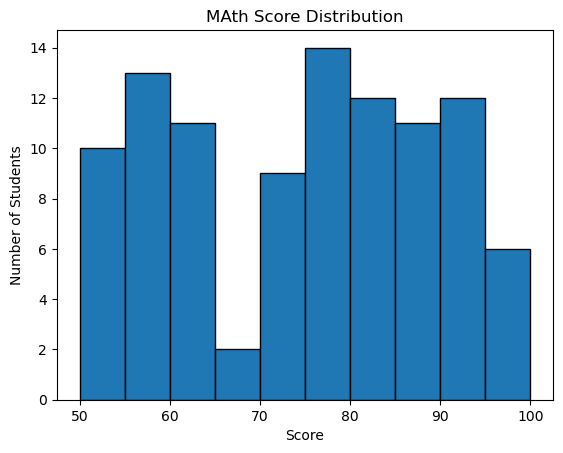

In [81]:
plt.hist(df['Math'], bins = 10, edgecolor = 'black')
plt.title('MAth Score Distribution')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()

Boxplot: Compare score distributions across subjects.

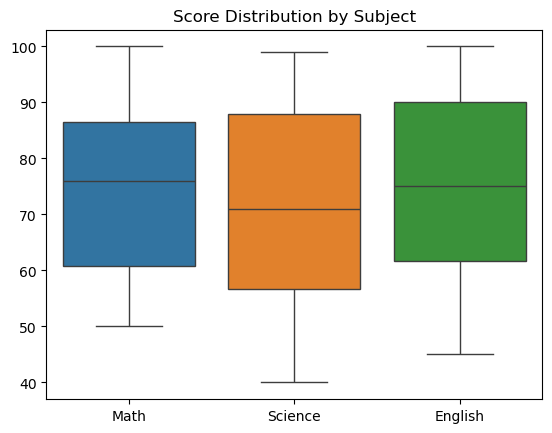

In [83]:
sns.boxplot(data=df[['Math', 'Science', 'English']])
plt.title('Score Distribution by Subject')
plt.show()

6. Correlation Analysis

Check if scores in different subjects are related:

In [84]:
corr_matrix = df[['Math', 'Science', 'English']].corr()
print(corr_matrix)

             Math   Science   English
Math     1.000000 -0.098888 -0.033144
Science -0.098888  1.000000  0.129900
English -0.033144  0.129900  1.000000


Visualize it with a heatmap (Seaborn).

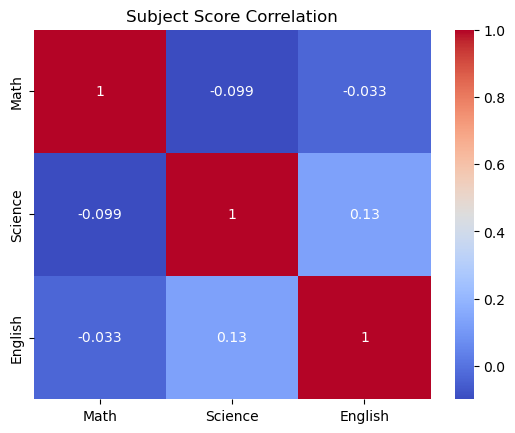

In [85]:
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.title('Subject Score Correlation')
plt.show()